<a href="https://colab.research.google.com/github/pritiyadav888/Machine-Learning-Projects/blob/main/k_meansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Retrieve and load the Olivetti faces dataset

In [55]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import mglearn
from sklearn.cluster import KMeans
faces = datasets.fetch_olivetti_faces()

In [2]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [3]:
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [4]:
face_Df =pd.DataFrame(faces.data)
face_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Columns: 4096 entries, 0 to 4095
dtypes: float32(4096)
memory usage: 6.3 MB


In [5]:
face_Df.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554


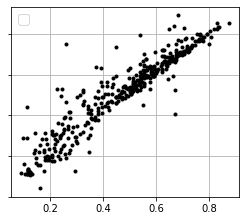

In [6]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plt.grid()
plt.legend()
plt.scatter(faces.data[:, 2], faces.data[:, 3], c="k", marker=".")
plt.tick_params(labelleft=False)
plt.gca().set_axisbelow(True)
plt.show()

In [8]:
def show_40_distinct_people(images, unique_ids):
    #Creating 4X10 subplots in  18x9 figure size
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    #For easy iteration flattened 4X10 subplots matrix to 40 array
    axarr=axarr.flatten()
    
    #iterating over user ids
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")

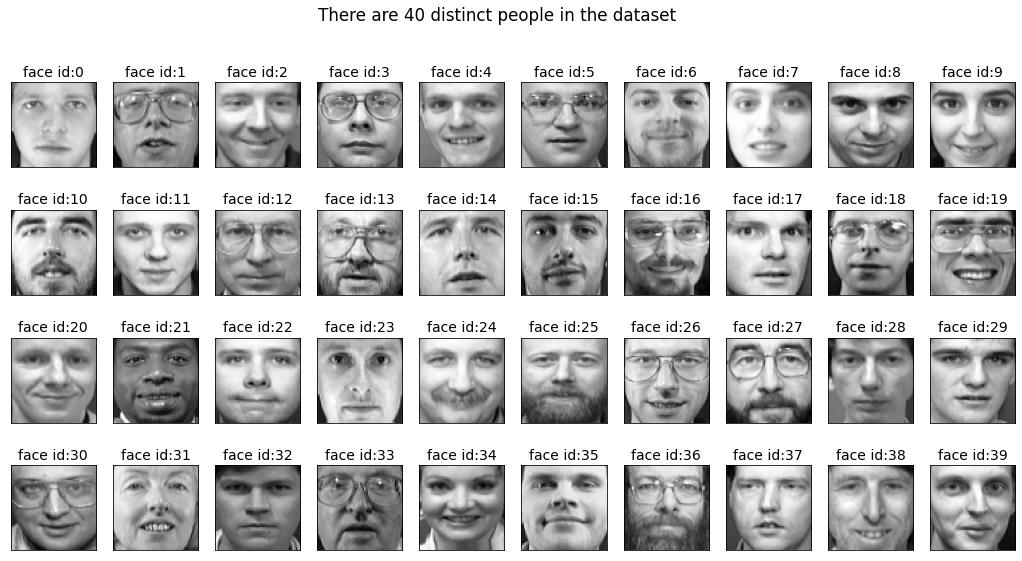

In [9]:
show_40_distinct_people(faces.images, np.unique(faces.target))

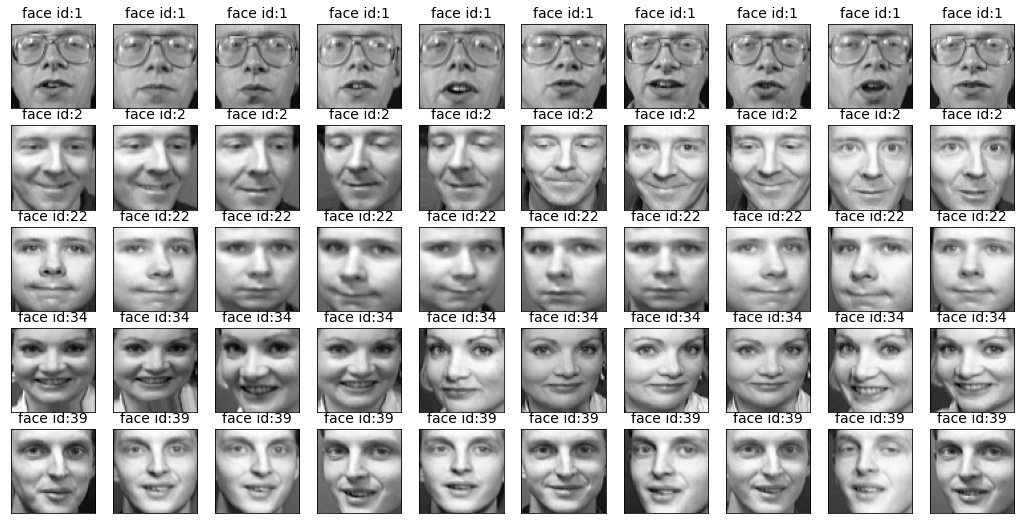

In [10]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
show_10_faces_of_n_subject(images=faces.images, subject_ids=[1,2, 22, 34, 39])

In [11]:
X = faces.data
y = faces.target
images = faces.images 

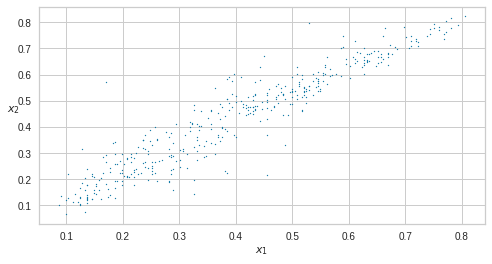

In [81]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()  

In [13]:
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

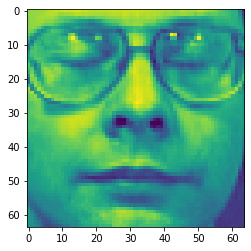

In [14]:
plt.imshow(images[38])

In [16]:
print("There are {} images in the dataset".format(len(X)))
print("There are {} unique targets in the dataset".format(len(np.unique(y))))
print("Size of each image is {}x{}".format(images.shape[1],images.shape[2]))
print("Pixel values were scaled to [0,1] interval. e.g:{}".format(images[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


Split the training set, a validation set, and a test set using stratified sampling to ensure that there are the same number of images per person in each set. Provide your rationale for the split ratio.

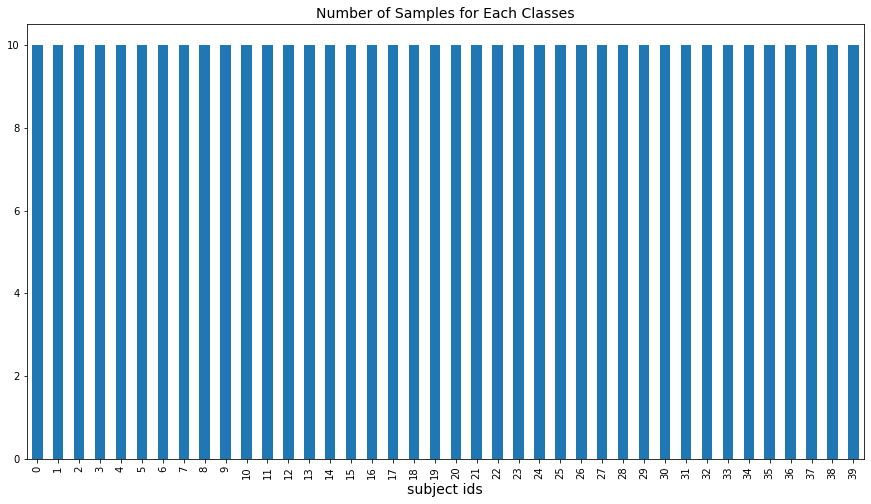

In [22]:
y_frame = pd.DataFrame()
y_frame['subject ids'] = y
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15, 8), title="Number of Samples for Each Classes")

In [27]:
# Use PCA to reduce the dimensionality of the dataset. On your initial run, keep 95% of the information content.
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
pca.n_components_

123

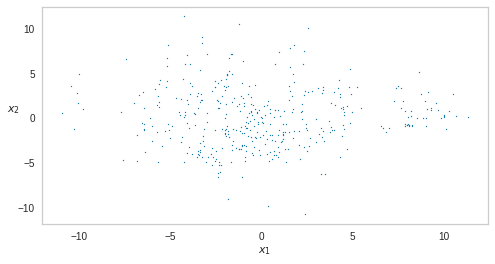

In [85]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X_pca)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [29]:
print("After Dimentionality reduction=> ", X_pca.shape)
print("Before Dimentionality reduction => ", X.shape)

After Dimentionality reduction=>  (400, 123)
Before Dimentionality reduction =>  (400, 4096)


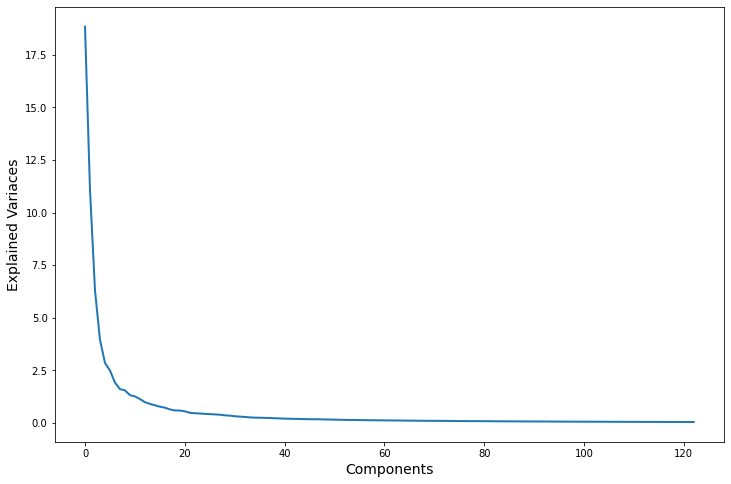

In [31]:
plt.figure(1, figsize=(12, 8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

With PCA split

In [86]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(X_pca, y))
X_train_valid = X_pca[train_valid_idx]
y_train_valid = y[train_valid_idx]
X_test_PCA = X_pca[test_idx]
y_test_PCA = y[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train_PCA = X_train_valid[train_idx]
y_train_PCA = y_train_valid[train_idx]
X_valid_PCA = X_train_valid[valid_idx]
y_valid_PCA = y_train_valid[valid_idx]
print(X_train_PCA.shape, y_train_PCA.shape)
print(X_valid_PCA.shape, y_valid_PCA.shape)
print(X_test_PCA.shape, y_test_PCA.shape)

(320, 123) (320,)
(40, 123) (40,)
(40, 123) (40,)


Without PCA split

In [87]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(X, y))
X_train_valid = X[train_valid_idx]
y_train_valid = y[train_valid_idx]
X_test = X[test_idx]
y_test = y[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(320, 4096) (320,)
(40, 4096) (40,)
(40, 4096) (40,)


Using k-fold cross validation, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. 

Before pca

In [88]:
clf_PCA = SVC(kernel='linear', C=1).fit(X_train_PCA, y_train_PCA)
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(clf_PCA, X_train_PCA, y_train_PCA, cv=kfold)
print("cross validations score for all 5 splits\n", scores)
print("{} mean cross validations score:{:.2f}\n".format(clf_PCA, scores.mean()))

cross validations score for all 5 splits
 [0.90625  0.953125 0.890625 0.984375 0.875   ]
SVC(C=1, kernel='linear') mean cross validations score:0.92



without pca 

In [89]:
clf = SVC(kernel='linear', C=1).fit(X_train, y_train)
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=kfold)
print("cross validations score for all 5 splits\n", scores)
print("{} mean cross validations score:{:.2f}\n".format(clf, scores.mean()))

cross validations score for all 5 splits
 [0.9375   0.953125 0.890625 0.984375 0.875   ]
SVC(C=1, kernel='linear') mean cross validations score:0.93



Validating with Pca split

Accuracy score:1.00


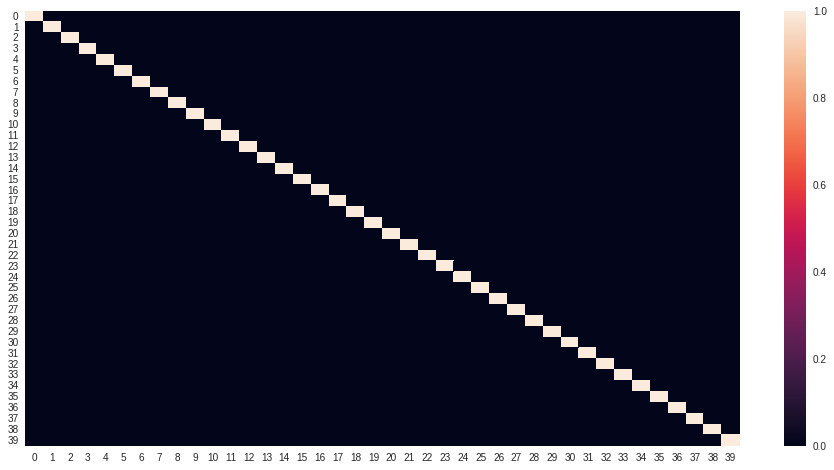

Classification Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
   

In [90]:
y_pred = clf_PCA.predict(X_valid_PCA)
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_valid_PCA, y_pred)))
cm = metrics.confusion_matrix(y_valid_PCA, y_pred)
plt.subplots(1, figsize=(16, 8))
sns.heatmap(cm)
plt.show()
print("Classification Results:\n{}".format(metrics.classification_report(y_valid_PCA, y_pred)))

Validating without Pca split

Accuracy score:1.00


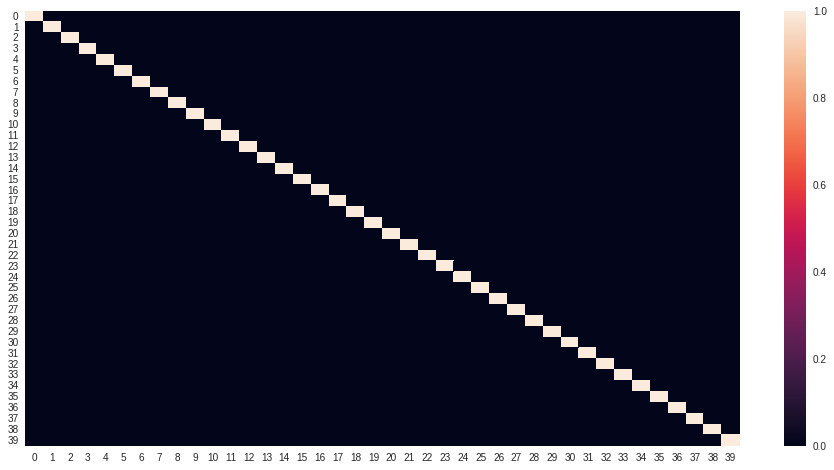

Classification Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
   

In [91]:
y_pred = clf.predict(X_valid)
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_valid, y_pred)))
cm = metrics.confusion_matrix(y_valid, y_pred)
plt.subplots(1, figsize=(16, 8))
sns.heatmap(cm)
plt.show()
print("Classification Results:\n{}".format(metrics.classification_report(y_valid, y_pred)))

Use K-Means to reduce the dimensionality of the set. Provide your rationale for the similarity measure used to perform the clustering. Use the silhouette score approach to choose the number of clusters

In [92]:
clf.score(X_test, y_test)

0.975

PCA is done in previous cells. Using K-Means to reduce the dimensionality of the set. Provide your rationale for the similarity measure used to perform the clustering. Use the silhouette score approach to choose the number of clusters

For n_clusters = 3 The average silhouette_score is : 0.1331095
For n_clusters = 5 The average silhouette_score is : 0.11575246
For n_clusters = 8 The average silhouette_score is : 0.10277765
For n_clusters = 13 The average silhouette_score is : 0.096661285
For n_clusters = 20 The average silhouette_score is : 0.123500794
For n_clusters = 22 The average silhouette_score is : 0.13376945
For n_clusters = 24 The average silhouette_score is : 0.130484
For n_clusters = 26 The average silhouette_score is : 0.14182149
For n_clusters = 28 The average silhouette_score is : 0.14267126
For n_clusters = 31 The average silhouette_score is : 0.15616916
For n_clusters = 30 The average silhouette_score is : 0.15287782
For n_clusters = 32 The average silhouette_score is : 0.15306896
For n_clusters = 34 The average silhouette_score is : 0.15919821
For n_clusters = 36 The average silhouette_score is : 0.15781361
For n_clusters = 38 The average silhouette_score is : 0.17507142
For n_clusters = 40 The avera

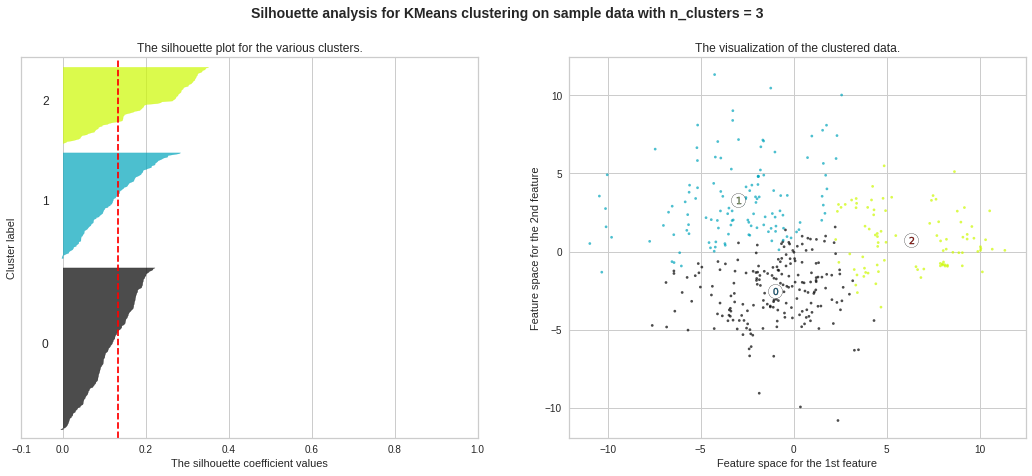

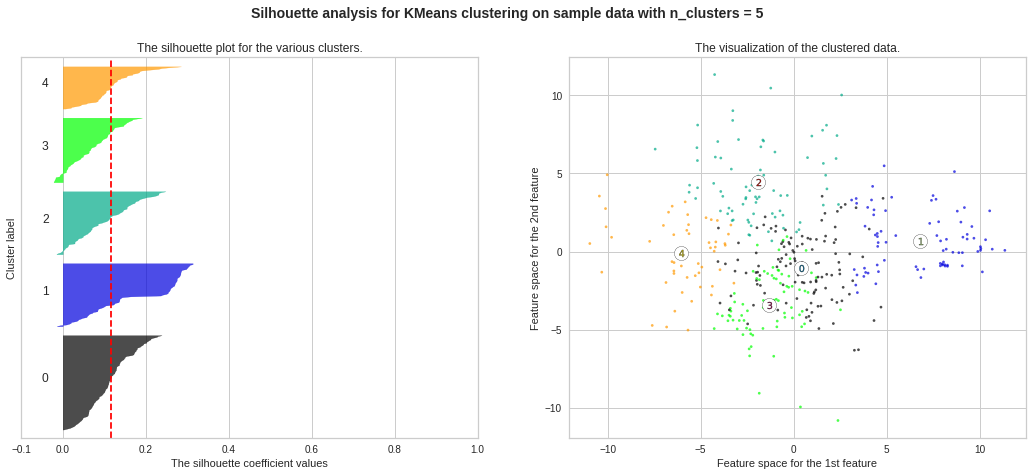

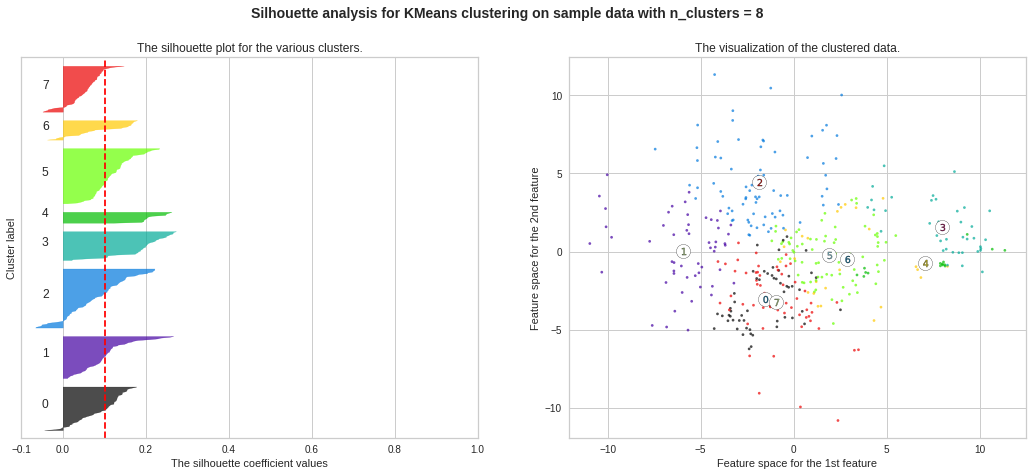

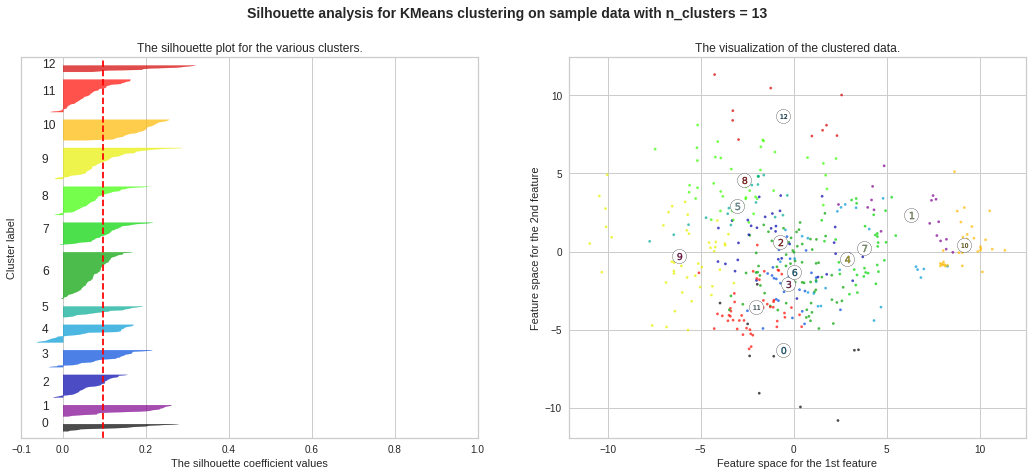

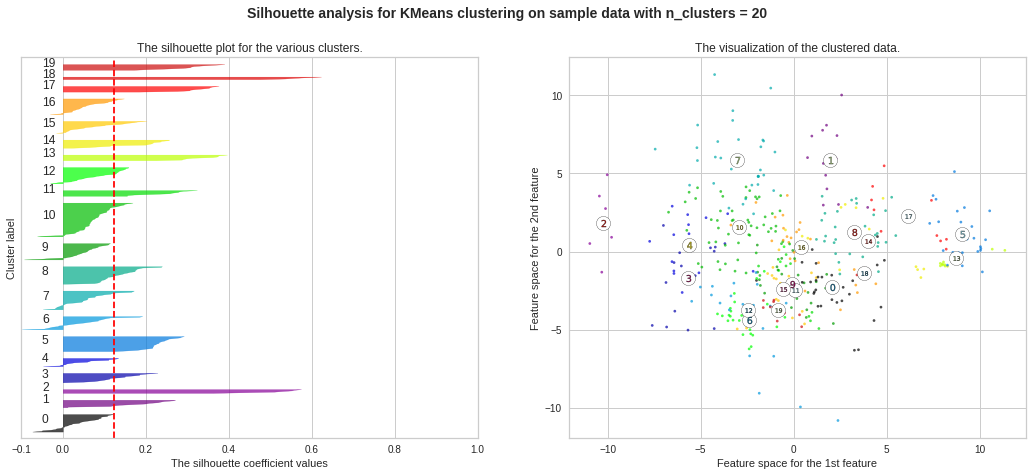

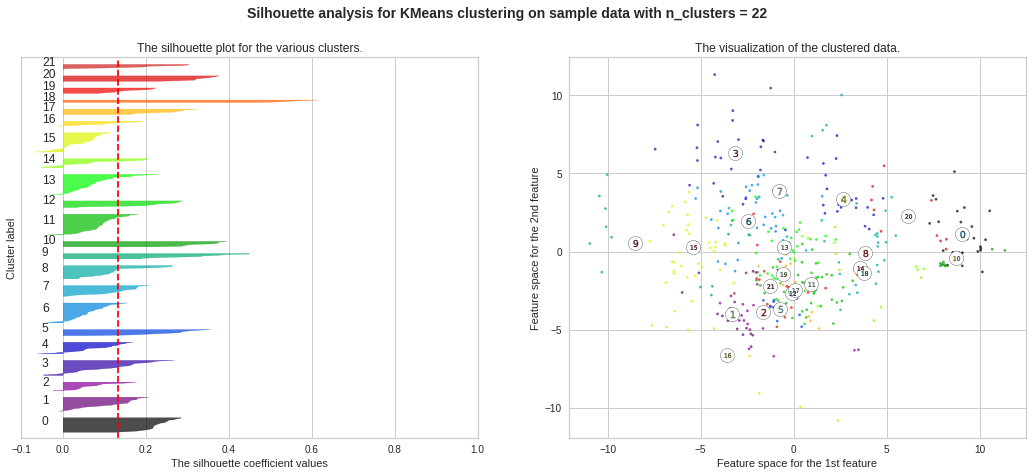

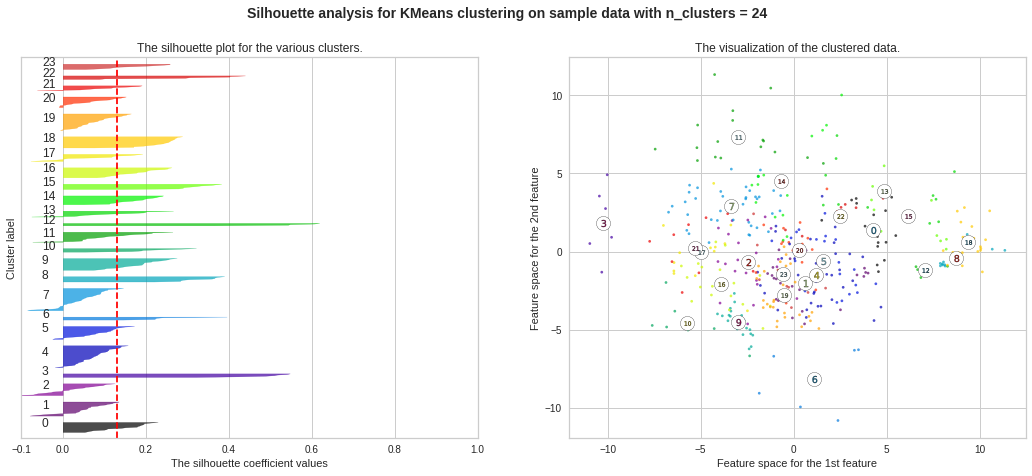

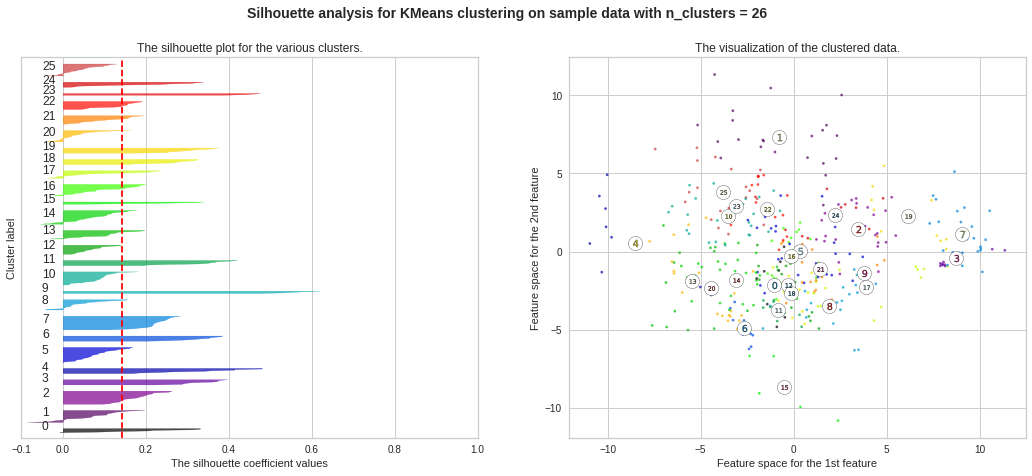

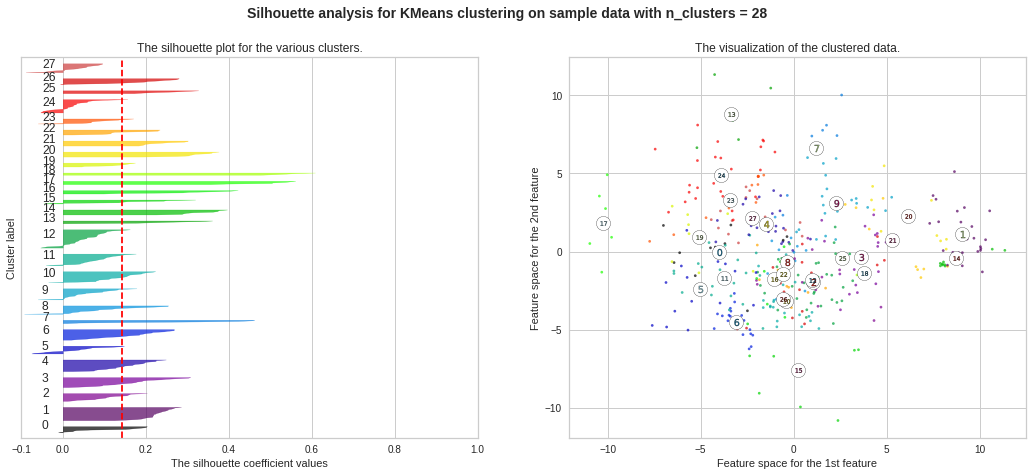

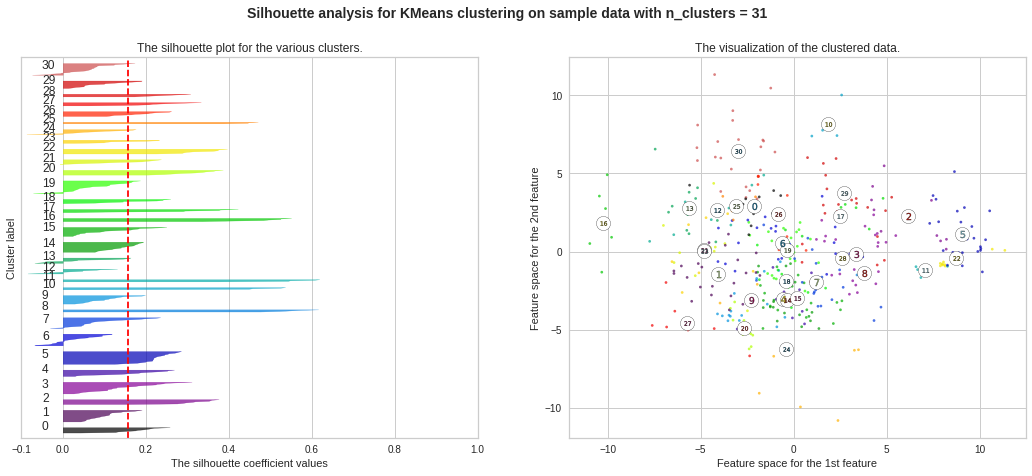

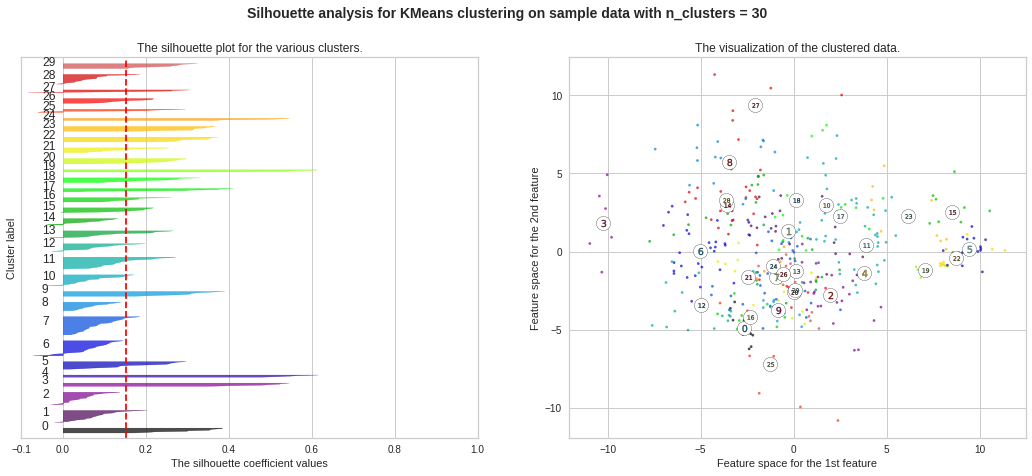

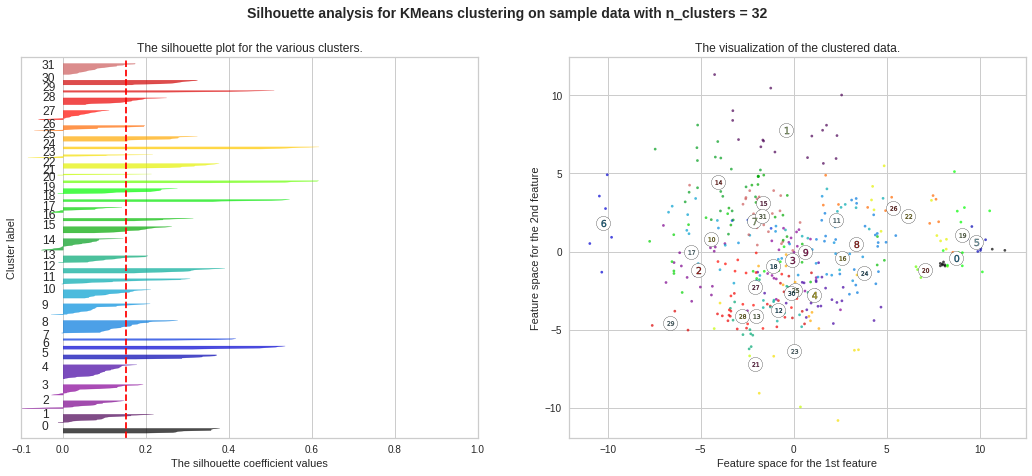

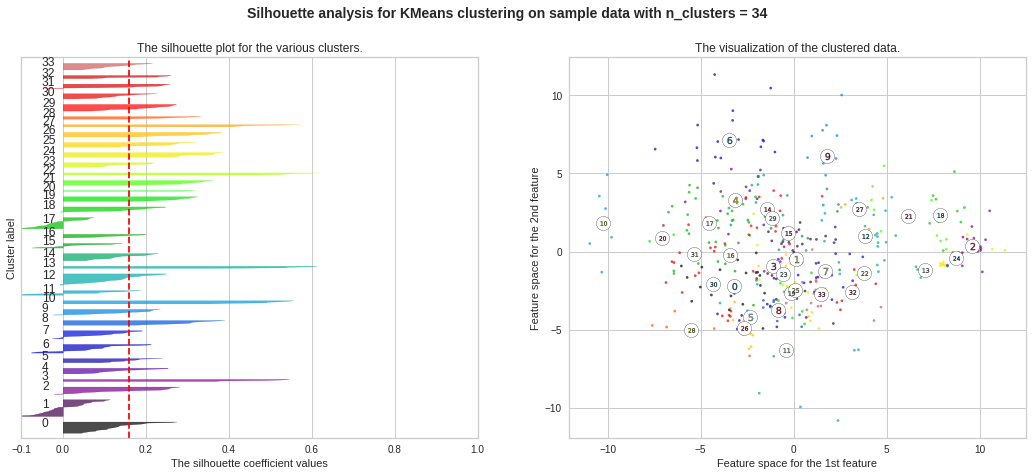

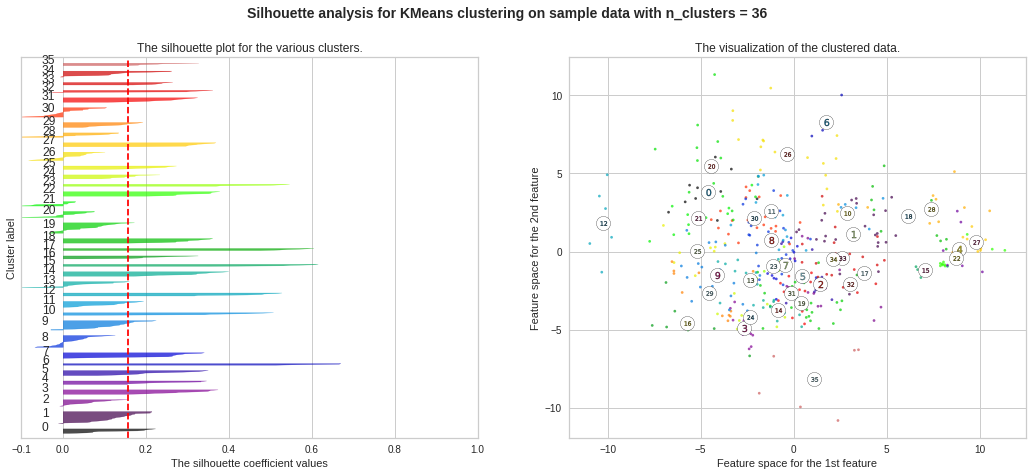

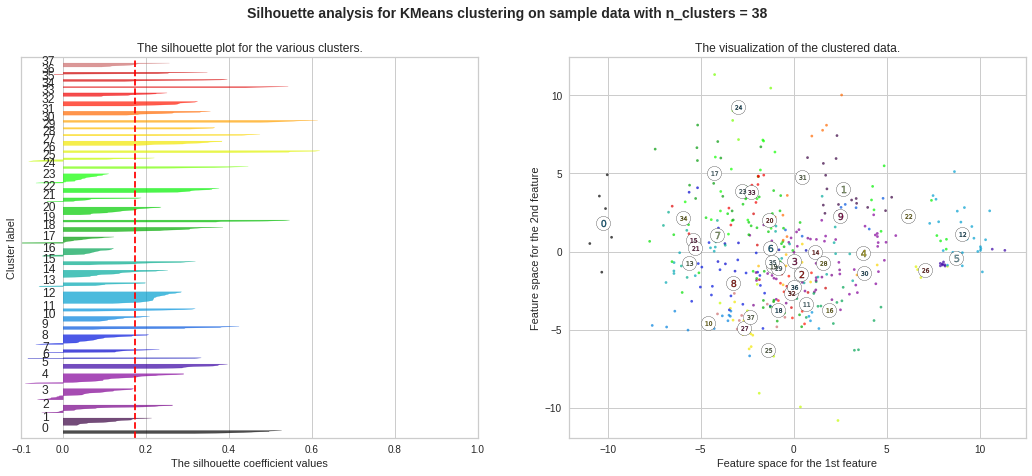

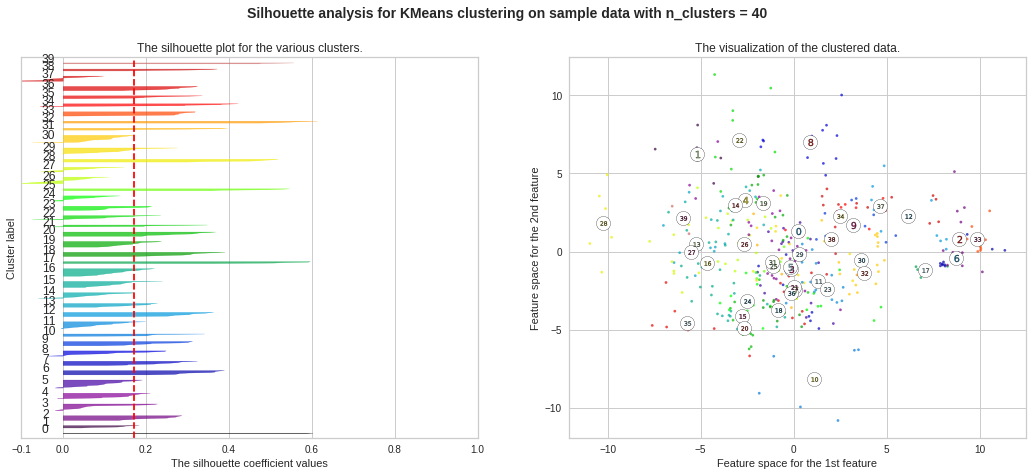

In [94]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [3, 5,8, 13, 20, 22, 24, 26,28,31, 30,32,34,36, 38,40]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_pca[:, 0], X_pca[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Elbow Curve Method

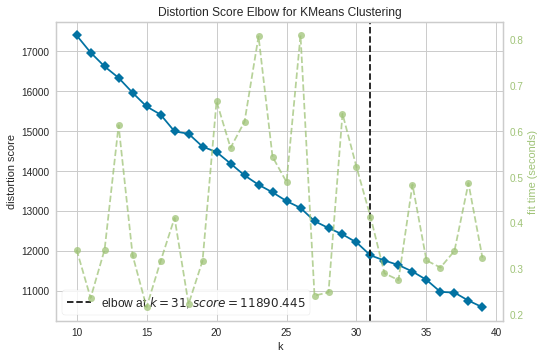

In [95]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(10,40))
Elbow_M.fit(X_pca)
Elbow_M.show()

In [63]:
from tqdm import tqdm
from scipy.spatial import distance
inertias = []

K = range(1, 40)
for k in tqdm(K):
    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, 
                    init='random',
                    random_state=5)
    kmeans.fit(X_train)
    inertia = kmeans.inertia_
    inertias.append(inertia)

100%|██████████| 39/39 [00:02<00:00, 15.04it/s]


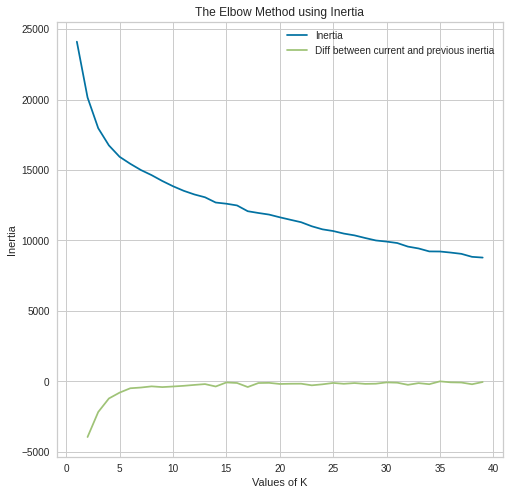

In [64]:
plt.figure(figsize=(8,8))
plt.plot(K, inertias, 'x-')
plt.plot(range(2, 40), np.diff(inertias), 'x-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.legend(['Inertia', 'Diff between current and previous inertia'])
plt.show()

In [96]:
Kmean = KMeans(n_clusters=31, init = "k-means++", random_state= 5)
y_mean = Kmean.fit(X_train_PCA)

In [97]:
y_mean

KMeans(n_clusters=31, random_state=5)

In [98]:
y_mean.cluster_centers_

array([[-5.2784152e+00,  4.6853989e-02, -1.9222025e+00, ...,
         9.3856165e-03,  4.2606208e-02,  8.3100118e-02],
       [-9.5975715e-01, -3.7762461e+00,  4.6986425e-01, ...,
         1.9649696e-02, -2.2787627e-02,  7.1126886e-02],
       [ 9.0516443e+00,  1.0712856e+00, -5.6217533e-01, ...,
        -2.5734503e-02, -1.4896644e-02,  8.3521858e-02],
       ...,
       [ 1.5471229e-01, -2.9144728e+00,  1.7162784e+00, ...,
         2.0059526e-02,  5.6507569e-02, -7.0371768e-03],
       [-3.4128976e+00,  2.7028951e-01,  2.8165421e+00, ...,
         2.0892613e-02, -2.9188404e-02,  3.4023698e-02],
       [ 1.8355094e+00,  8.1375656e+00, -2.9633470e+00, ...,
        -1.0880441e-03,  1.1361057e-01,  2.0127049e-02]], dtype=float32)

In [99]:
centers=np.array(y_mean.cluster_centers_)
labels=Kmean.labels_
labels

array([13,  1, 13, 27, 16,  9, 11,  2, 21, 30, 16, 29, 15,  2, 26, 12, 13,
       27, 22, 11, 20, 11, 12, 11,  2, 25, 24, 28,  2, 10, 28,  9, 26, 27,
       13,  0, 27, 22, 29,  6,  4,  2, 13, 14, 17, 15, 14, 15, 11, 12, 13,
       16,  7,  1,  0, 26, 27, 17,  2, 20, 26,  6, 30, 12,  4, 26, 24,  4,
       12, 17, 29,  6,  1, 30,  5, 15, 15, 22, 11, 24, 21, 19, 14,  6, 12,
       10,  4, 29, 18,  1, 15,  8, 11, 15, 15, 15, 25, 25,  6, 14,  6, 30,
       22,  0, 26,  9, 13, 12, 21, 16, 15, 13, 29, 27, 24, 11, 11, 12, 13,
        8, 11, 28, 19,  8, 21,  8, 13,  4, 24, 26, 12, 10, 12, 16,  2,  5,
        7,  2, 12, 18, 13,  2,  2,  4,  2, 29, 27, 11, 18,  8, 11,  8,  2,
       15, 21, 26, 28, 14,  4, 25, 29,  4, 24,  9, 22, 16,  2,  8, 19,  4,
       24,  0, 20, 22,  3, 15, 22, 25,  3, 13, 12,  8,  7, 26, 12,  1,  2,
       25, 11, 26,  4, 12, 20, 11, 11, 14,  6,  2, 23,  8,  2,  4, 11, 17,
       22, 25, 22, 19, 29, 19,  6,  6, 28, 17, 19,  6, 21, 20, 22, 14, 15,
       29, 20, 14,  4, 19

In [101]:
labels = Kmean.predict(X_valid_PCA)
labels

array([24,  1, 13, 21, 16, 13, 25,  3, 15,  0,  4,  8, 26, 26, 25, 23,  2,
        5, 14, 26,  2, 29,  0, 25,  4, 19, 28,  2,  6,  3, 11, 27, 12, 19,
        4, 12,  7,  9,  8, 15], dtype=int32)

In [267]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
scores = cross_val_score(kmeans, X_train_PCA, y_train_PCA, cv=kfold)
print("cross validations score for all 5 splits\n", scores)
print("{} mean cross validations score:{:.2f}\n".format(kmeans, scores.mean()))

cross validations score for all 5 splits
 [-1720.50244141 -1626.40588379 -1719.82055664 -1638.78747559
 -1921.04736328]
KMeans(n_clusters=165, random_state=42) mean cross validations score:-1725.31



In [105]:
kmeans.score(X_test_PCA, y_test_PCA)

-1100.2840576171875